In [2]:
import os
import glob
from pixellib.semantic import semantic_segmentation
import tqdm
import pdb
import pickle
segment_image = semantic_segmentation()

segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")

images = glob.glob("./**/*/*.JPG", recursive=True)
# images = [x for x in images if "capitole"  in x]


In [3]:
model = segment_image.model2

In [5]:
import tensorflow as tf

In [6]:
tf.saved_model.save(model, "saved_model")

INFO:tensorflow:Assets written to: saved_model/assets


In [5]:
from PIL import Image
import numpy as np
image_path = images[0]
image = np.array(Image.open(image_path))     

# resize to max dimension of images from training dataset
w, h, n = image.shape


In [6]:
ratio = 1
resized_image = np.array(Image.fromarray(image.astype('uint8')).resize((int(ratio * h), int(ratio * w))))

In [7]:
mean_subtraction_value = 127.5
resized_image = (resized_image/mean_subtraction_value) -1

In [8]:
trained_image_width = 512*np.ceil(resized_image.shape[0]/512)
trained_image_height = 512*np.ceil(resized_image.shape[1]/512)

In [9]:
trained_image_height

3072.0

In [10]:
pad_x = int(trained_image_width - resized_image.shape[0])
pad_y = int(trained_image_height - resized_image.shape[1])
resized_image = np.pad(resized_image, ((0, pad_x), (0, pad_y), (0, 0)), mode='constant')


In [11]:
resized_image.shape

(2560, 3072, 3)

In [12]:
trained_image_width//512

5.0

In [13]:
res= np.zeros((1,int(trained_image_width), int(trained_image_height), 151),dtype=float)
# for i in range(int(trained_image_width//512)):
#     for j in range(int(trained_image_height//512)):
#         img = resized_image[512*(i):512*(i+1),512*(j):512*(j+1),:]
#         res[0, 512*(i):512*(i+1),512*(j):512*(j+1),:] = model.predict(np.expand_dims(img, 0))
        

In [14]:
res.shape

(1, 2560, 3072, 151)

In [15]:
res

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [16]:
res[:,:-pad_x][:,:,:].shape

(1, 2304, 0, 151)

In [18]:
image.shape

(2304, 3072, 3)

: 

In [8]:
import os
import glob
from pixellib.semantic import semantic_segmentation
import tqdm
import pdb
import pickle
segment_image = semantic_segmentation()

pickles = glob.glob("./**/*/*.pkl", recursive=True)

In [9]:
def extract_info(x):
    with open(x,"rb") as f:
        data = pickle.load(f)
    a = np.argmax(data, axis=-1)
    return  np.unique(a, return_counts=True)

In [10]:
diction = {k:0 for k in range(151)}


In [12]:
import numpy as np

In [ ]:
for x in pickles:
    b,c = extract_info(x)
    for idx, j in enumerate(b):
        diction[j]+=c[idx]

In [18]:
def keyfunction(k):
    return diction[k]
L = []
# sort by dictionary by the values and print top 3 {key, value} pairs
for key in sorted(diction, key=keyfunction, reverse=True)[:20]:
    print("%s: %i" % (key, diction[key]))
    L.append(key)

2: 26829463
5: 7390179
3: 6467232
12: 2136673
1: 1946236
18: 1592638
7: 752281
6: 640686
9: 228712
60: 200807
128: 143139
4: 126403
10: 124850
21: 97446
13: 95120
88: 76923
14: 72580
44: 56575
54: 44408
33: 42237


In [19]:
from pixellib.semantic import create_ade20k_label_namemap, create_ade20k_label_colormap

In [20]:
namemap = create_ade20k_label_namemap()
colors = create_ade20k_label_colormap()

In [21]:
for i in L:
    print(i, namemap[i], colors[i])

2 building [180 120 120]
5 tree [  4 200   3]
3 sky [  6 230 230]
12 sidewalk [235 255   7]
1 wall [120 120 120]
18 plant [204 255   4]
7 road [140 140 140]
6 ceiling [120 120  80]
9 windowpane [230 230 230]
60 stairway [ 31   0 255]
128 bicycle [255 245   0]
4 floor [80 50 50]
10 grass [  4 250   7]
21 car [  0 102 200]
13 person [150   5  61]
88 streetlight [  0  71 255]
14 earth [120 120  70]
44 signboard [255   5 153]
54 stairs [255 224   0]
33 fence [255 184   6]


In [22]:
import matplotlib.pyplot as plt

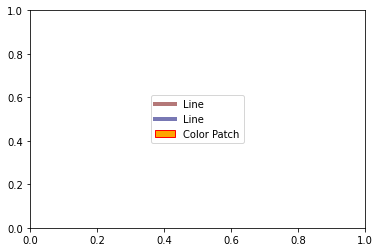

In [32]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color=(180.0/255, 120.0/255, 120.0/255), lw=4, label='Line'),
                   Line2D([0], [0], color=(120.0/255, 120.0/255, 10.0/255), lw=4, label='Line'),
                   Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.show()


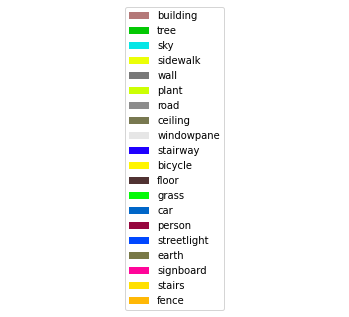

In [38]:

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color=(180.0/255, 120.0/255, 120.0/255), lw=4, label='Line'),
                   Line2D([0], [0], color=(120.0/255, 120.0/255, 180.0/255), lw=4, label='Line'),
                   Patch(facecolor='orange', 
                         label='Color Patch')]
legend_elements = []
for i in L:
    legend_elements.append(Patch(facecolor=colors[i]/255, label=namemap[i]))

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')
plt.axis("off")
plt.savefig("Legends.png",dpi=2000)

In [ ]:
colors -